In [3]:

!python -m pip install "tensorflow<2.11"
# Verify the installation:
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

[]

2023-12-02 17:49:49.652866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-12-02 17:49:49.654205: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-02 17:50:08.952419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-12-02 17:50:08.956477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-12-02 17:50:08.961986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-12-02 17:50:09.370798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [4]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [5]:
df = pd.read_csv('budget-data/budget-data-model.csv')
df_model2 = df.copy()
x_train, x_test, y_train, y_test = train_test_split(df_model2.drop(['unit_price'], axis=1), df_model2['unit_price'], test_size=0.2, random_state=42)
df_model2.head()

,company_name,quote_id,unit_price,Length,Height,Gutter,_F7,_F8,_F9,_G2,_G3,_G4,_H13,_H14,_M5,_M6
0,162,17171.0,7.5,625.0,500.0,50.0,0,0,0,0,0,1,0,0,0,0
1,162,17171.0,27.5,625.0,500.0,50.0,1,0,0,0,0,0,0,0,0,0
2,162,17175.0,28.5,592.0,490.0,48.0,1,0,0,0,0,0,0,0,0,0
3,162,18643.0,27.5,592.0,592.0,45.0,1,0,0,0,0,0,0,0,0,0
4,162,18643.0,17.5,287.0,592.0,45.0,1,0,0,0,0,0,0,0,0,0


In [6]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [7]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [8]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
61/61 [==============================] - 3s 16ms/step - loss: 0.4184 - mean_squared_logarithmic_error: 0.4152 - val_loss: 0.1596 - val_mean_squared_logarithmic_error: 0.1514
Epoch 2/10
61/61 [==============================] - 1s 9ms/step - loss: 0.1282 - mean_squared_logarithmic_error: 0.1279 - val_loss: 0.1580 - val_mean_squared_logarithmic_error: 0.1502
Epoch 3/10
61/61 [==============================] - 1s 9ms/step - loss: 0.1210 - mean_squared_logarithmic_error: 0.1206 - val_loss: 0.1439 - val_mean_squared_logarithmic_error: 0.1366
Epoch 4/10
61/61 [==============================] - 1s 10ms/step - loss: 0.1133 - mean_squared_logarithmic_error: 0.1126 - val_loss: 0.1392 - val_mean_squared_logarithmic_error: 0.1321
Epoch 5/10
61/61 [==============================] - 1s 8ms/step - loss: 0.1026 - mean_squared_logarithmic_error: 0.1021 - val_loss: 0.1351 - val_mean_squared_logarithmic_error: 0.1285
Epoch 6/10
61/61 [==============================] - 0s 8ms/step - loss: 0.1032

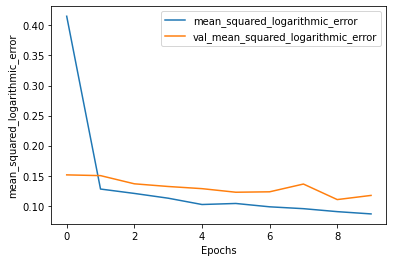

In [9]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')